# Credit Risk Classification

In [49]:
# load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

## Split Data into Training and Testing Sets

#### 1 – Read and Review Data

In [35]:
# Read the lending_data file into a data frame
lending_df = pd.read_csv('Resources/lending_data.csv')

# review the data frame
lending_df.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


#### 2 – Create Labels Set and Feature Matrix
Create the labels set, $y$, from the 'loan_status' column. Then create the features matrix, $X$, from the remaining DataFrame columns:

In [36]:
# separate the data into label and features
y = lending_df['loan_status']
X = lending_df.loc[:, lending_df.columns != 'loan_status']

In [37]:
# review the y variable Series
y.describe()

count    77536.000000
mean         0.032243
std          0.176646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [38]:
# review the X variable DataFrame
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


#### 3 – Check Balance of Label Variable
Check the balance of our target variable, $y$, using the `value_counts` function:

In [39]:
# check target variable balance
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

#### 4 – Split Data
Split the data into training and testing sets using `train_test_split`:

In [40]:
# import the `train_test_learn` module
from sklearn.model_selection import train_test_split

# split the data, assigning a random_state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [41]:
# quick shape check
print(f"""
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape}
""")


X_train shape: (58152, 7)
X_test shape: (19384, 7)
y_train shape: (58152,)
y_test shape: (19384,)



In [42]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# fit a scaler to the training data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

# transform the training and testing feature matrices
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train and Test a Logistic Regression Model

### Train with Original Data

#### 1 – Fit a Logistic Regression to the Training Set
Fit a logistic regression model using the training data, `X_train` and `y_train`:

In [43]:
# import the LogisticRegression module
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression model
# assign a random_state of 1
classifier = LogisticRegression(random_state=1)

# fit the model to training data
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

#### 2 – Predict Against the Testing Set
Save predictions on the testing data labels using the testing feature data, `X_test`, and the fitted model:

In [44]:
# make predictions against the testing data
y_pred = classifier.predict(X_test_scaled)

#### 3 – Evaluate Model Performance

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [45]:
# print the `balanced_accuracy`` score of the model
test_acc = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy score for the model is {test_acc}.')

The balanced accuracy score for the model is 0.9889115309798473.


Text(0.5, 36.72222222222221, 'Predicted Values')

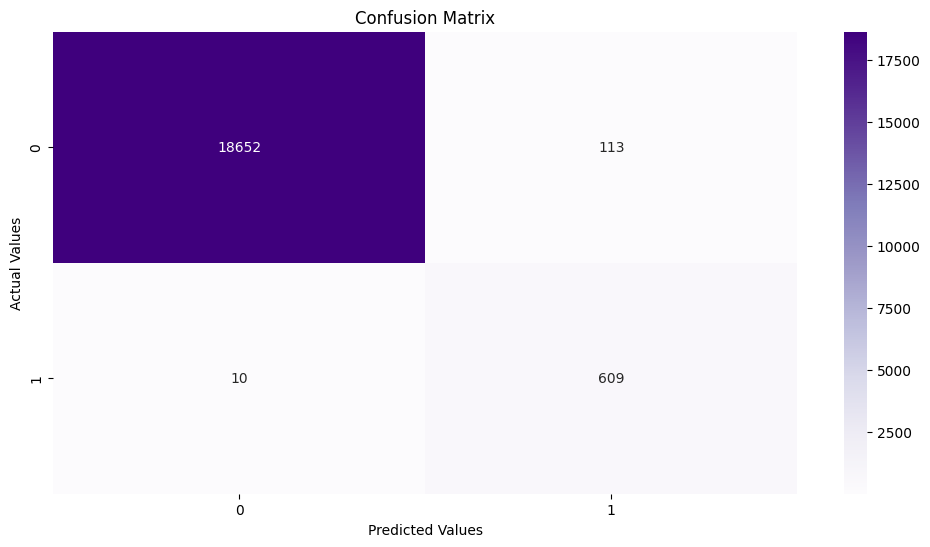

In [53]:
# generate a confusion matrix for the model
con_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(con_mat, annot=True,fmt='d', cmap='Purples')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')


In [54]:
# print the classification report for the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.98      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



#### 4 – Analysis
The fundamental question is: _How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?_

It seems that our model has high accuracy overall, which might initially lead us to believe that it is quite adept at its credit classification task.

Digging into classwise precision and recall, however, we see a different picture altogether. While high precision and recall scores on the healthy loan class indicate that the model accurately predicts healthy loans, we find that its performance on risky loans is lower, at 0.84 precision and 0.98 recall.

What does this mean more precisely? Well, let's dig into the respective definitions of those terms:
- $\text{Recall} = \frac{\text{True Positive}}{\text{True Positive } + \text{ False Negative}}$

- $\text{Precision} = \frac{\text{True Positive}}{\text{True Positive } + \text{ False Positive}}$

In other words, 84% of the flags thrown by our system to indicate a high-risk loan were justified, while 16% were not. Furthermore, 98% of the loans that should have been flagged were caught by the model. Critically, we must realize that a 2% failure rate has translated, in this test case, to the issuance of 10 risky loans. Without further data regarding the potential institutional and systemic impact of borrower default on these 10 loans, it would be impossible to make an informed statement about the sufficiency of this model to serve its intended purspose.

### Train with Resampled Data

#### 1 – Resample the Data
Use the `RandomOverSampler` module from the `imblearn` (imbalanced learn) library to resample the data. Confirm that the labels have an equal number of data points:

In [59]:
# import the `RandomOverSampler`
from imblearn.over_sampling import RandomOverSampler

# instantiate a random_oversampler model
# # assign a random_state of 1
ros = RandomOverSampler(random_state=1)

# fit the original training data to the random_oversampler model
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

In [60]:
# count distinct values of the resampled target data
y_res.value_counts()

loan_status
0    56271
1    56271
Name: count, dtype: int64

#### 2 – Fit and Predict Using the Resampled Training Set

Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions:

In [61]:
# instantiate a logistic regression model
# assign a random_state of 1
classifier_res = LogisticRegression(random_state=1)

# fit the model using the resampled training data
classifier_res.fit(X_res, y_res)

LogisticRegression(random_state=1)

In [62]:
# make a prediction using the testing data
y_res_pred = classifier_res.predict(X_test_scaled)

#### 3 – Evaluate Model Performance

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [63]:
# print the balanced_accuracy score of the model 
test_acc_res = balanced_accuracy_score(y_test, y_res_pred)
print(f'The balanced accuracy score for the model fit to resampled data is {test_acc_res}.')

The balanced accuracy score for the model fit to resampled data is 0.9934383134311076.


Text(0.5, 36.72222222222221, 'Predicted Values')

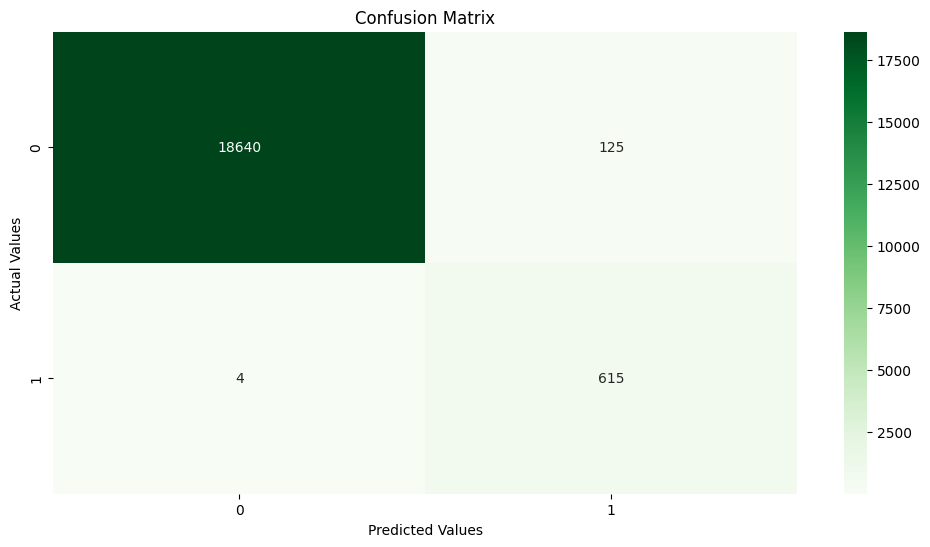

In [64]:
# generate a confusion matrix for the model
# generate a confusion matrix for the model
con_mat = confusion_matrix(y_test, y_res_pred)

plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(con_mat, annot=True,fmt='d', cmap='Greens')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [65]:
# print the classification report for the model
print(classification_report(y_test, y_res_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



#### 4 – Analysis

The fundamental question is: _How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?_

Interestingly, the overall performance of our model seems to have improved slightly, while precision with respect to high-risk loans has decreased.

In this instance, it may be justified to say that v2 of our model is a better performer because we have flagged more credit risk cases than we did with the model trained only on our original data set. If the firm is concerned with eliminating issuance of risky loans altogether, neither model is sufficient. If the firm is interested in minimizing issuance of risky loans and reducing the need for human oversight of credit application screenings to mitigate human resource costs, v2 of our model may be the best solution to implement. If, however, it is not fiscally irresponsible to accept the error rate produced by our previous model, the firm may stand to generate more income with v1 of our model because it does not screen out as many qualified applicants (the firm failed to issue 12 additional loans to qualified applicants on the basis of model error in v2 compared with v1).